<a href="https://colab.research.google.com/github/jtj7387/AI_2020_spring/blob/master/10_3_xor_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
##import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt


In [16]:
#XOR
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [17]:
X = tf.placeholder(tf.float32, [None, 2]) 
Y = tf.placeholder(tf.float32, [None, 1])

* 안되는 네트워크 구조 예제. 되도록 고쳐봅시다. 
-> import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()를 추가한다

In [18]:
W = tf.Variable(tf.random_normal([2,1]), name='weight') # W1 [입력, 출력] b[몇 개에 적용되는지]
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [19]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [20]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [21]:
sess = tf.Session()

In [22]:
sess.run(tf.global_variables_initializer())

In [23]:
vcost =[]

In [24]:
for step in range(10001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        
        print(cost1)

0.7436335
0.7134998
0.7023418
0.69730246
0.69502854
0.6940007
0.6935351
0.6933237
0.6932275
0.69318384
0.69316393


Text(0.5, 0, 'epoch')

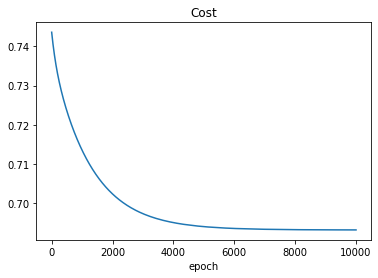

In [25]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [26]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [27]:
print(test1[0][0])

0.49569765


In [28]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})